In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
coinex_btc = pd.read_csv("../coinex_BTCUSDT.csv")
binance_btc = pd.read_csv("../binance_BTCUSDT.csv")

In [34]:
coinex_btc["timestamp"] = pd.to_datetime(coinex_btc["timestamp"], unit="s")

In [35]:
coinex_btc

,timestamp,price
0,2025-08-09 08:40:58.466971397,116938.02
1,2025-08-09 08:40:58.867064476,116938.02
2,2025-08-09 08:41:01.927594423,116938.03
3,2025-08-09 08:41:04.900663614,116938.03
4,2025-08-09 08:41:07.889091492,116938.02
...,...,...
27784,2025-08-10 08:40:28.868560314,118115.49
27785,2025-08-10 08:40:31.868561983,118115.49
27786,2025-08-10 08:40:34.871923685,118115.49
27787,2025-08-10 08:40:37.876549482,118115.49


In [38]:
binance_btc["timestamp"] = pd.to_datetime(binance_btc["timestamp"], unit="ms")

In [39]:
binance_btc

,timestamp,price
0,2025-08-09 08:40:59.839,116920.4
1,2025-08-09 08:41:01.847,116920.3
2,2025-08-09 08:41:03.942,116920.4
3,2025-08-09 08:41:05.928,116920.4
4,2025-08-09 08:41:07.879,116920.3
...,...,...
43095,2025-08-10 08:40:37.527,118086.3
43096,2025-08-10 08:40:39.491,118090.4
43097,2025-08-10 08:40:41.123,118090.4
43098,2025-08-10 08:40:43.572,118090.4


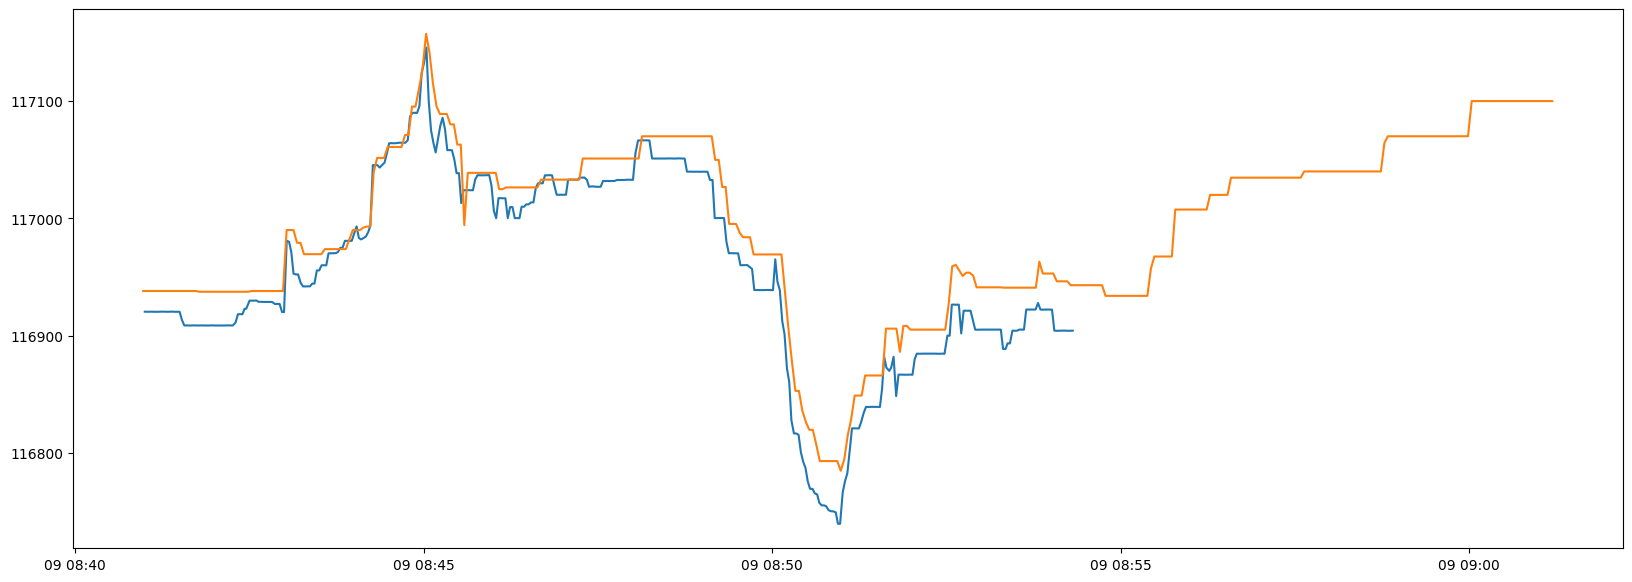

In [47]:
start = 0
end = 400
fee = 0.028/100

fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(binance_btc.iloc[start:end]["timestamp"], binance_btc.iloc[start:end]["price"], label="binanc BTCUSDT")
ax.plot(coinex_btc[start:end]["timestamp"], coinex_btc.iloc[start:end]["price"], label="coinex BTCUSDT")

ax.plot(binance_btc.iloc[start:end])

In [49]:
merged = pd.merge_asof(coinex_btc, binance_btc, on="timestamp").bfill()

In [50]:
merged

,timestamp,price_x,price_y
0,2025-08-09 08:40:58.466971397,116938.02,116920.3
1,2025-08-09 08:40:58.867064476,116938.02,116920.3
2,2025-08-09 08:41:01.927594423,116938.03,116920.3
3,2025-08-09 08:41:04.900663614,116938.03,116920.4
4,2025-08-09 08:41:07.889091492,116938.02,116920.3
...,...,...,...
27784,2025-08-10 08:40:28.868560314,118115.49,118080.4
27785,2025-08-10 08:40:31.868561983,118115.49,118080.4
27786,2025-08-10 08:40:34.871923685,118115.49,118080.4
27787,2025-08-10 08:40:37.876549482,118115.49,118086.3


In [52]:
binance_btc["price"]/binance_btc["price"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
43095    1.0
43096    1.0
43097    1.0
43098    1.0
43099    1.0
Name: price, Length: 43100, dtype: float64